In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import misc

Reading in the Dataset
==

This notebook looks for quality problems with the features, and takes action accordingly.
The code bears similarity to the Data Quality Report, but the goal and result is different.

It picks up from the "data_after_part1.csv" dataset saved in the "Data Quality - Part 1" notebook, and saves to the "data_after_part2.csv" dataset.

In [4]:
# I've chosen to keep the old index for now.
data = pd.read_csv("data_after_part1.csv", parse_dates = [1,2,3], index_col=0)

for field in data.columns[3:]:
    data[field] = data[field].astype("category")

data.head(3)

,cdc_case_earliest_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-08-25,2020-08-27,2020-08-25,Laboratory-confirmed case,Female,30 - 39 Years,Hispanic/Latino,No,Unknown,No,Unknown
1,2020-12-15,2020-12-15,NaT,Laboratory-confirmed case,Female,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
2,2020-09-21,NaT,2020-09-21,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,No,Missing,No,Missing


Summary Table
==

This summarizes the results of the "Individual Features" section

In [59]:
# I'm sure there is an easier way of manually typing out a data frame, but
# I didn't see one as of writing this.
plan = [
    ["None", None, "None"], # Earliest dt
    ["Missing values", "Major", "Column Dropped", "Caveat w.r.t Part 4"], # Pos Spec
    ["Missing values", "Major", "Column Dropped", "Caveat w.r.t Part 4"], # Onset
    ["None", None, "None"], # Current status
    ["'Missing' and 'Unknown' values", "Minor", "Combine 'Missing' and 'Unknown'"], # Sex,
    ["Missing Values", "Minor", "None"], # Age
    ["'Missing' and 'Unknown' values", "Minor", "Combine 'Missing' and 'Unknown'"], # Race/Eth.
    ["'Missing', 'Unknown' and 'OTH' values", "Major", "Combine 'Missing', 'Unknown' and 'OTH'"], # Hospital
    ["'Missing' and 'Unknown' values", "Major", "Combine 'Missing' and 'Unknown'"], # ICU
    ["None", None, "None"], # Death
    ["'Missing' and 'Unknown' values", "Major", "Combine 'Missing' and 'Unknown'"] # Medcond
]

plan = pd.DataFrame(plan, index = data.columns, columns = ["Issue", "Severity", "Action", "Notes"])
plan = plan.fillna("")
display(plan)

,Issue,Severity,Action,Notes
cdc_case_earliest_dt,None,,None,
pos_spec_dt,Missing values,Major,Column Dropped,Caveat w.r.t Part 4
onset_dt,Missing values,Major,Column Dropped,Caveat w.r.t Part 4
current_status,None,,None,
sex,'Missing' and 'Unknown' values,Minor,Combine 'Missing' and 'Unknown',
age_group,Missing Values,Minor,None,
race_ethnicity_combined,'Missing' and 'Unknown' values,Minor,Combine 'Missing' and 'Unknown',
hosp_yn,"'Missing', 'Unknown' and 'OTH' values",Major,"Combine 'Missing', 'Unknown' and 'OTH'",
icu_yn,'Missing' and 'Unknown' values,Major,Combine 'Missing' and 'Unknown',
death_yn,None,,None,


Apply Actions
==

In [78]:
result = data.copy()

# These may become relevant again in part 4, but for now, drop them.
result = result.drop("pos_spec_dt", axis=1)
result = result.drop("onset_dt", axis=1)

# These work across columns actually, which makes this
# short and neat.
result = result.replace("Missing", "Unknown")
result = result.replace("OTH", "Unknown")

result.to_csv("data_after_part2.csv")
result.head(3)

,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-08-25,Laboratory-confirmed case,Female,30 - 39 Years,Hispanic/Latino,No,Unknown,No,Unknown
1,2020-12-15,Laboratory-confirmed case,Female,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
2,2020-09-21,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,No,Unknown,No,Unknown


Justification - Individual Features
==

For each dataset, discuss individual issues.

There is no need to save plots here, this has already been done in the Quality Report.

Note that for several features, there is missing data. In theory, it might be fine to just drop the rows with missing data, especially when the portion missing is small. However, for now, I prefer to keep any record that is not missing the target feature, and add consider a single "Missing" or "Null" option to be a valid value instead.

(This is also recommended by the ML for Predictive Data Anlytics textbook, section 3.4.1)

In [35]:
def describe_dt(key):
    
    data[key].hist(bins=20)
    
    nulls = data[key].isna().sum()
    null_msg = str(nulls) + " Nulls"
    
    if nulls > 0:
        nulls_percent = 100 * (nulls / len(data))
        null_msg += ", " + str(nulls_percent) + "%"
    
    print(f"({null_msg})")
    
    
def describe_cat(key, charts = None):
    """
    Display simple tallies and charts for a
    categorical feature.
    """
    
    result = pd.DataFrame(index = data[key].unique())
    
    result["Freq."] = data[key].value_counts()
    result["%"] = data[key].value_counts(normalize=True) * 100
    
    display(result)

    nulls = data[key].isna().sum()
    print("(Nulls:", nulls, end=")\n")
    
    tally = data[key].value_counts()
    tally.plot(kind="bar", ylabel="")

Earliest DT
==

No nulls, and the distribution looks fine given the distribution of COVID cases.

No issues here.

**No action taken.**

(0 Nulls)


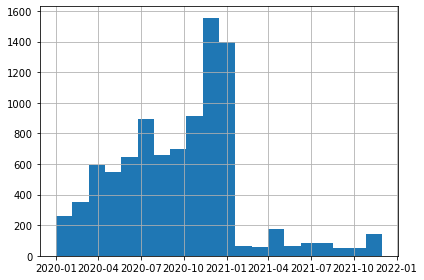

In [6]:
describe_dt("cdc_case_earliest_dt")

Pos. Spec. DT
==

The distribution looks fine, but **there are lots and lots of nulls**. (About 70%)

My first theory is that that nulls just indicate a lack of positive confirmation, and so the above figure is perfectly fine.

This is wrong though! The "current_status" field suggests that over 90% of records are confirmed cases in the laboratory.

So this is just missing data.

Frankly, given the proportion of nulls and the fact that this column is almost a duplicate, I think it adds little information. And that imputing would add little information.

**Action: drop column!**

(6536 Nulls, 70.35522066738429%)


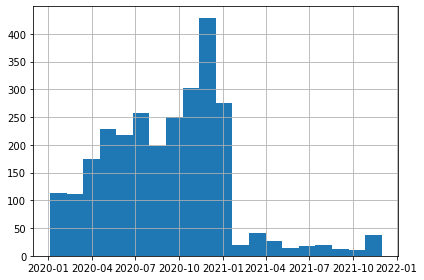

In [8]:
describe_dt("pos_spec_dt")

Onset DT
==

Again, the distribution is fine. Very similar to that of the previous two columns, which is expected. (This was discussed in more detail in the Data Quality Report).

Again, **the problem is nulls**, and again, I would interpret that as indicating cases for which there was no previous declaration of symptoms.

Rather than drop rows, or impute, I'd prefer to create a new feature to capture this. (And disregard the precise dates). 

This will await part 4.

**Action: drop column!**.

(4449 Nulls, 47.890204520990316%)


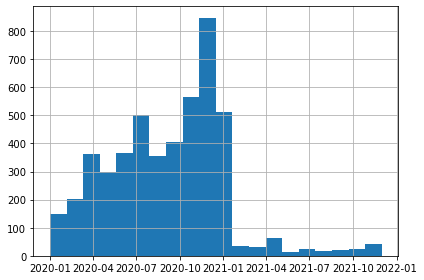

In [9]:
describe_dt("onset_dt")

Current Status
==



No missing values!
That's great.

The distribution is heavily weighted towards "confirmed case", but is not unexpected. It is something to be aware of when creating test and training datasets, possibly.

**No action taken**

,Freq.,%
Laboratory-confirmed case,8602,92.594187
Probable Case,688,7.405813


(Nulls: 0)


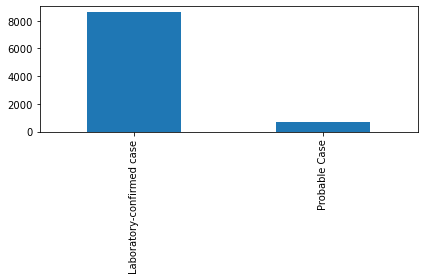

In [13]:
describe_cat("current_status")

Sex
==

There are minor issues with this feature. A small proportion of the values are "Missing", and another small proportion are "Unknown".

Most of data is present. There is a slightly larger proportion of females in this dataset, but the different is small enough that it does not seem a concern.

For the sake of resolving ambiguity, "Missing" and "Unknown" should be combined here - either way, the gender data is not present.

However, there might be an interesting distinction between "Missing" and "Unknown". One might be just the user putting down nothing, or something illegible. The other may indicate that the user wished for another option.

Given the small proportion of such values, more advanced treatment is not worth it here. But in other features where this comes up again, at larger scales, it might be.

**Action: combine "Unknown" and "Missing"**

,Freq.,%
Female,4774,51.388590
Male,4426,47.642626
Unknown,75,0.807320
Missing,15,0.161464


(Nulls: 0)


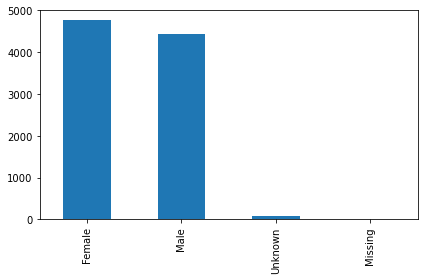

In [15]:
describe_cat("sex")

Age Group
==

A tiny proportion of missing values. No "Unknown" vs "Missing.". 

The distribution isn't too surprising, considering the population demographic in Ireland today and the fact that children are quite resistant to the virus. I'm slightly surprised at the high number of 20-29 year olds here, but not nearly enough that I would consider it likely there was an issue with the dataset.

It might be interesting to make a numerical feature from this, but that is an issue for Part 4.

**No action taken**

,Freq.,%
30 - 39 Years,1439,15.489774
10 - 19 Years,998,10.742734
20 - 29 Years,1714,18.449946
60 - 69 Years,965,10.387513
40 - 49 Years,1356,14.596340
80+ Years,469,5.048439
50 - 59 Years,1315,14.155005
70 - 79 Years,593,6.383208
0 - 9 Years,429,4.617869
Missing,12,0.129171


(Nulls: 0)


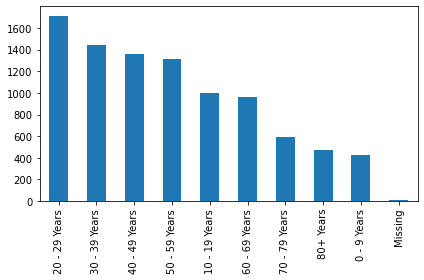

In [16]:
describe_cat("age_group")

Race and Ethnicity
==

There is a large proportion of "Unknown" values in this one, and a small proportion of separate "Missing" values.

I don't think there is much that can be done here. The values cannot be imputed (short of maybe making a separate ML model for that purpose), and there are too many to even consider dropping rows. 

The one minor thing is to, again, combine "Unknown" and "Missing", since I doubt that small proportion of "Missing" brings much to the dataset.

One thing to consider later is the possibility of separating the feature a little. Asian, White, Black, etc, could be separated from Hispanic/Non-Hispanic

**Action: combine "Unknown" and "Missing"**

,Freq.,%
Hispanic/Latino,980,10.548977
"Black, Non-Hispanic",671,7.222820
Unknown,3611,38.869752
"Asian, Non-Hispanic",252,2.712594
"White, Non-Hispanic",3146,33.864370
"Multiple/Other, Non-Hispanic",470,5.059203
"American Indian/Alaska Native, Non-Hispanic",57,0.613563
Missing,85,0.914962
"Native Hawaiian/Other Pacific Islander, Non-Hispanic",18,0.193757


(Nulls: 0)


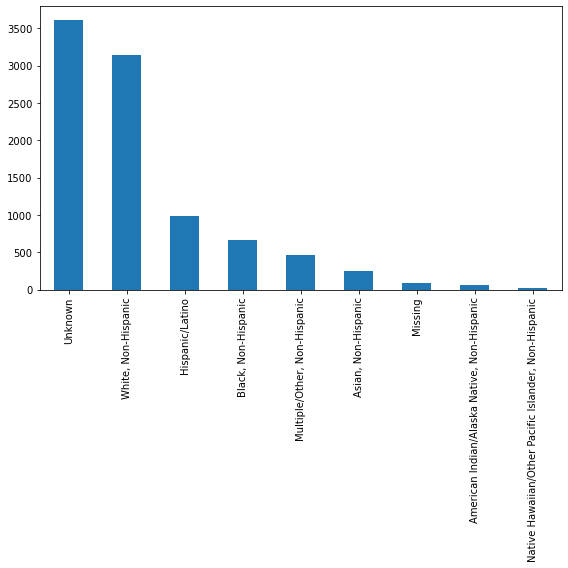

In [22]:
plt.figure(figsize=(8,8)) # Some labels are long in this one.
describe_cat("race_ethnicity_combined")

Hospital
==

Lots and lots of missing values here. It's possible "Missing" could be imputed to "No" here, given the likelihood that someone is hospitalized over Covid is maybe not too high. (Especially if they are young.)

There is a tiny proportion of "OTH" values, which I presume stands for "other". I doubt it adds much information, and could probably be combined with "Unknown".

"Missing" and "Unknown" both take up large proportions of the dataset. If there is an interesting distinction between them, it may be worth extracting this to a feature in Part 4. For example: "hosp_yn_status" with possible values "Specified"/"Missing"/"Unknown".

For the sake of this feature, though, "Missing" and "Unknown" provide much the same information, and so might as well be combined.

**Action taken: combine "OTH", "Missing" and "Unknown"**

,Freq.,%
No,4941,53.186222
Missing,2101,22.615716
Yes,673,7.244349
Unknown,1572,16.921421
OTH,3,0.032293


(Nulls: 0)


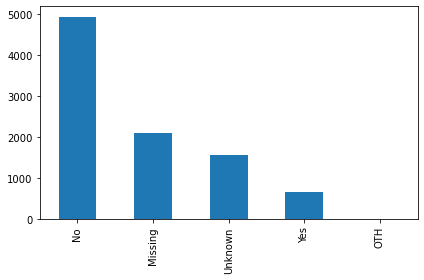

In [23]:
describe_cat("hosp_yn")

Intensive Care
==

There is only a tiny proportion of "Yes" in this one. However, given that it is an indication of serious trouble for the health of a patient, this tiny proportion is likely far from negligible. 
(This is to be explored further in Part 3)

Missing and Unknown again both take up significant proportions. Similar to with hosp_yn, these are to be combined. (With the difference potentially extracted to a feature later in Part 4)

**Action taken: combine "Missing" and "Unknown"**

,Freq.,%
Unknown,1258,13.541442
Missing,6939,74.693219
No,1017,10.947255
Yes,76,0.818084


(Nulls: 0)


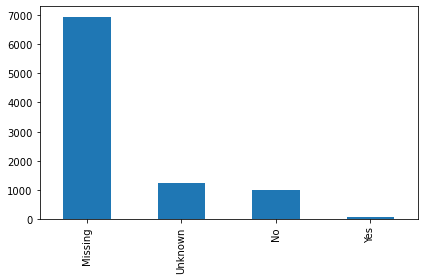

In [24]:
describe_cat("icu_yn")

One finally minor note is that quick consistency check can be done. This confirms that anyone in intensive care was admitted to a hospital.

Though I feel it worth noting that a few exceptions to this rule might actually be expected - depending on the admin of a given hospital, it might be possible that a person admitted to the ICU who then doesn't stay long might not be considered fully hospitalized, for the sake of fees and paperwork and the convenience of everyone involved.

In [30]:
len(data[(data.icu_yn == "Yes") & (data.hosp_yn == "No")])

0

Death
==

No problems with this one, thankfully, given that it is the target feature.

A quick internet search gives 2% as an estimated death rate in Ireland, which is lower than the 3% here. However, the former number could be based on an estimate of cases that (perhaps because they were minor) never made it to the CDC database as well as those that did.

**No action taken**

,Freq.,%
No,8954,96.383208
Yes,336,3.616792


(Nulls: 0)


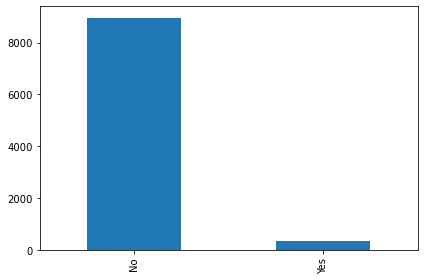

In [32]:
describe_cat("death_yn")

Medical Conditions
==

Similar to ICU, there are a lot of missing values here, and very few "Yes" values. However, those few "Yes" values could be very important, given the risk that medical conditions can pose.

As before, "Missing" and "Unknown" are to be combined.

It occurs to me that "Missing" could well be imputed to "No", since often such forms only require you to fill in these sections if you have a condition. Furthermore, if you don't know you have a condition, I imagine you aren't very likely to have a serious condition relevant to covid.

These are just guesses, but the point is moot. I don't think it's worth making the imputation. If there is a deep similarity between "Missing" and "No", I think the ML will pick it up naturally. But it might be worth future consideration when iterating and trying to find ways to improve the model.

**Action: combine "Missing" and "Unknown"**

,Freq.,%
Unknown,741,7.976319
No,906,9.752422
Missing,6822,73.433800
Yes,821,8.837460


(Nulls: 0)


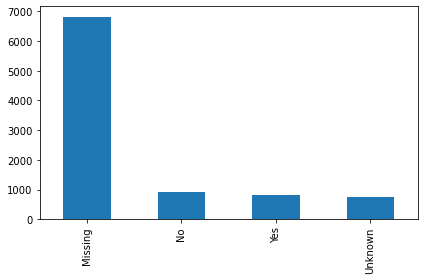

In [34]:
describe_cat("medcond_yn")